In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from helper import *
import os
from nltk.corpus import wordnet

In [2]:
with open('config.json') as config_file:
    config = json.load(config_file)
data_path = config['data_path']

In [5]:
bad_img_reference_ids = np.load('bad_bleu_score_reference_indexes.npy', allow_pickle=True)

In [22]:
bad_img_reference_ids.shape

(1767,)

file_id: 0
/scratch3/hle/refCOCO/imgs_by_id/296747.jpg
{'ref_sents': ['guy petting elephant', 'foremost person', 'green shirt'], 'label': 1, 'bbox': [[59.04999923706055, 93.23999786376953, 375.0199890136719, 362.5799865722656]]}


,box_alias,image_id,ann_id,ref_id,salience,x1,y1,w,h,TYPE_yolk,...,ATTR_thin,ATTR_decorative,ATTR_wrinkled,ATTR_peeling,ATTR_golden,ATTR_metallic,ATTR_back,ATTR_thick,ATTR_black and white,ATTR_leaning
0,trunk-1,296747,469306,24882,0.058165,411.079834,256.495056,85.829346,199.942230,0.000624,...,0.002494,0.002491,0.002523,0.002491,0.002491,0.002491,0.002500,0.002497,0.002491,0.002491
1,man-1,296747,469306,24882,0.246415,160.744263,125.726784,216.845001,335.273224,0.000624,...,0.002495,0.002494,0.002497,0.002494,0.002494,0.002494,0.002496,0.002494,0.002495,0.002518
2,elephant-1,296747,469306,24882,0.298262,434.499969,19.280037,205.287811,428.662079,0.000624,...,0.002494,0.002493,0.002627,0.002493,0.002493,0.002493,0.002496,0.002498,0.002493,0.002494
3,hair-1,296747,469306,24882,0.021163,186.153610,83.822449,77.811691,80.242737,0.000624,...,0.002494,0.002493,0.002494,0.002493,0.002493,0.002493,0.002495,0.002500,0.002496,0.002493
4,shirt-1,296747,469306,24882,0.108199,124.160843,161.846359,173.210648,184.301651,0.000624,...,0.002492,0.002492,0.002503,0.002492,0.002492,0.002492,0.002493,0.002495,0.002492,0.002492
5,head-1,296747,469306,24882,0.182997,409.485199,0.000000,229.364655,235.395401,0.000624,...,0.002495,0.002493,0.002623,0.002493,0.002493,0.002493,0.002500,0.002509,0.002493,0.002494
6,face-1,296747,469306,24882,0.162378,455.965698,2.273539,184.034302,260.320709,0.000624,...,0.002494,0.002493,0.002654,0.002493,0.002493,0.002493,0.002500,0.002510,0.002493,0.002494
7,tree-1,296747,469306,24882,0.184662,3.764547,0.000000,219.274033,248.468781,0.000624,...,0.002498,0.002494,0.002494,0.002494,0.002494,0.002493,0.002496,0.002563,0.002493,0.002496
8,jeans-1,296747,469306,24882,0.118828,14.044736,316.630463,243.695526,143.864136,0.000624,...,0.002492,0.002492,0.002494,0.002492,0.002491,0.002492,0.002492,0.002492,0.002492,0.002492
9,ground-1,296747,469306,24882,0.377812,199.497482,205.554993,440.502502,253.050995,0.000624,...,0.002494,0.002493,0.002497,0.002494,0.002494,0.002494,0.002494,0.002495,0.002494,0.002494


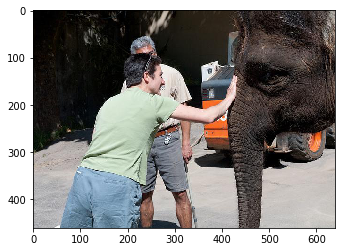

In [35]:
file_id = 0#np.random.choice(bad_img_reference_ids) #409
print(f'file_id: {file_id}')
df = pd.read_csv(os.path.join(data_path,f'refCOCO/attr_tables/attr_{file_id}.tsv'), encoding='utf-8',sep='\t')
img_id = df['image_id'][0]
filename = os.path.join(data_path, f'refCOCO/imgs_by_id/{img_id}.jpg')
print(filename)
image = plt.imread(filename)
plt.imshow(image)
with open(os.path.join(data_path,f'refCOCO/labels/lab_{file_id}.json')) as json_file:
    label = json.load(json_file)
print(label)

df

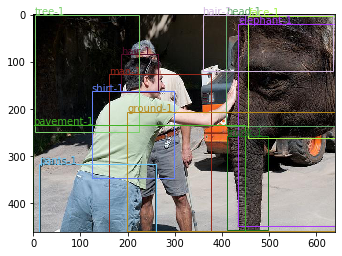

In [37]:
box_data = df[['box_alias', 'x1','y1','w','h']]
fig,ax = plt.subplots(1)
img = image

ax.imshow(img)
rng = [i for i in range(len(box_data))]
for i in rng[:]:
    name, x,y,w,h = list(box_data.iloc[i,:])
    ax = draw_box_obj(name,x,y,w,h,img,ax)

['guy petting elephant', 'foremost person', 'green shirt']


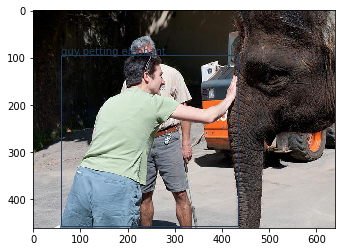

In [38]:
print(label['ref_sents'])
bbox = label['bbox'][0]
sentence = label['ref_sents'][0]
fig,ax_true_label = plt.subplots(1)
ax_true_label.imshow(img)
draw_box_obj(sentence,bbox[0],bbox[1],bbox[2],bbox[3],img,ax_true_label)

In [21]:
matched_label = np.load('test_imgs_label_matching.npy', allow_pickle=True)
expressions = {}
start = 0
for i in range(5):
    expressions[i] = np.load(f'top3_exps_from_{start}_to_{start+1000}.npy', allow_pickle=True)
    start += 1000
for i in expressions:
    print(expressions[i].shape)
    
print(expressions[0][409])

(1000, 3)
(1000, 3)
(1000, 3)
(1000,)
(1000,)
['man' 'restaurant' 'man']


In [18]:
print(matched_label[file_id])

[[17, 'man-2', 0.5299702712742602], [10, 'restaurant-1', 0.4212806935448702], [5, 'woman-1', 0.38286666171730543], [1, 'people-1', 0.31980457052499345], [14, 'table-1', 0.30422408635215353]]


In [29]:

print(expressions[0][0])

['sidewalk' 'man' 'ground']


In [40]:
def top_5_match(candidates, target):
    x1, y1, w1,h1 = target[0],target[1],target[2],target[3]
    best_matches = []
    for i in range(len(candidates)):
        name, x2,y2,w2,h2 = list(candidates.iloc[i,:])
        overlapped_area = calc_overlap(x1,y1,w1,h1,x2,y2,w2,h2)
        total_area = w1*h1 + w2*h2 - overlapped_area
        similarity = overlapped_area/total_area
        heapq.heappush(best_matches, [-similarity, name, i])

    top_5 = [heapq.heappop(best_matches) for _ in range(min(5, len(best_matches)))]
    for elem in top_5:
        elem[0], elem[1], elem[2] = elem[2], elem[1], -elem[0]
    return top_5

def get_synonyms(word):
    synsets = wordnet.synsets(word)
    synonyms = set()
    for syn in synsets:
        for l in syn.lemmas(): 
            synonyms.add(l.name())
    return synonyms


{'detent', 'hot_dog', 'dog', 'wiener', 'click', 'give_chase', 'wienerwurst', 'track', 'Canis_familiaris', 'dog-iron', 'frump', 'bounder', 'weenie', 'hound', 'firedog', 'chase', 'trail', 'heel', 'go_after', 'tail', 'hotdog', 'domestic_dog', 'andiron', 'frankfurter', 'frank', 'chase_after', 'tag', 'blackguard', 'cad', 'pawl'}


In [54]:
images_with_no_obj_synonyms_ref_ids = []
counter = 0
for file_id in bad_img_reference_ids:
    df = pd.read_csv(os.path.join(data_path,f'refCOCO/attr_tables/attr_{file_id}.tsv'), encoding='utf-8',sep='\t')
    img_id = df['image_id'][0]
    filename = os.path.join(data_path, f'refCOCO/imgs_by_id/{img_id}.jpg')
    image = plt.imread(filename)
#     plt.imshow(image)
    with open(os.path.join(data_path,f'refCOCO/labels/lab_{file_id}.json')) as json_file:
        label = json.load(json_file)
    box_data = df[['box_alias', 'x1','y1','w','h']]
    target_box = label['bbox'][0]
    top5_mtch = top_5_match(box_data, target_box)
    objs = [obj[:obj.index('-')] for obj_id, obj, prob in top5_mtch]
    ref_sentences = label['ref_sents']
    obj_synonyms_in_target_count = []
    for obj in objs:
        synonyms = get_synonyms(obj)
        contain_synonyms = [len(list(synonyms & set(ref.split(' ')))) for ref in ref_sentences]
        obj_synonyms_in_target_count.append(sum(contain_synonyms))
    if not np.any(obj_synonyms_in_target_count):
        images_with_no_obj_synonyms_ref_ids.append(file_id)
    counter += 1
    if counter %50 == 0:
        print(f'finish {counter} files, num files with detections contain no synonyms of target {len(images_with_no_obj_synonyms_ref_ids)}')
print(len(images_with_no_obj_synonyms_ref_ids))

finish 50 files, num files with detections contain no synonyms of target 28
finish 100 files, num files with detections contain no synonyms of target 57
finish 150 files, num files with detections contain no synonyms of target 87
finish 200 files, num files with detections contain no synonyms of target 113
finish 250 files, num files with detections contain no synonyms of target 146
finish 300 files, num files with detections contain no synonyms of target 180
finish 350 files, num files with detections contain no synonyms of target 208
finish 400 files, num files with detections contain no synonyms of target 237
finish 450 files, num files with detections contain no synonyms of target 265
finish 500 files, num files with detections contain no synonyms of target 290
finish 550 files, num files with detections contain no synonyms of target 318
finish 600 files, num files with detections contain no synonyms of target 348
finish 650 files, num files with detections contain no synonyms of t

In [55]:
images_with_no_obj_synonyms_ref_ids[:10]

[9, 12, 14, 24, 27, 36, 42, 43, 46, 51]

file_id: 9
/scratch3/hle/refCOCO/imgs_by_id/484946.jpg
{'ref_sents': ['picture of person with glasses, behind the screen', 'whole poster actually', 'PIC BEHIND LAPTOP'], 'label': 72, 'bbox': [[179.75999450683594, 131.10000610351562, 247.24000549316406, 310.4700012207031]]}


,box_alias,image_id,ann_id,ref_id,salience,x1,y1,w,h,TYPE_yolk,...,ATTR_thin,ATTR_decorative,ATTR_wrinkled,ATTR_peeling,ATTR_golden,ATTR_metallic,ATTR_back,ATTR_thick,ATTR_black and white,ATTR_leaning
0,hand-1,484946,1625617,8456,0.130234,209.342667,0.000000,215.449631,165.191360,0.000624,...,0.002501,0.002494,0.002523,0.002494,0.002495,0.002494,0.002509,0.002500,0.002494,0.002503
1,wall-1,484946,1625617,8456,0.269411,0.202575,50.034710,187.018875,393.674500,0.000624,...,0.002493,0.002492,0.002492,0.002492,0.002492,0.002492,0.002493,0.002494,0.002492,0.002492
2,computer-1,484946,1625617,8456,0.255528,0.000000,288.646393,245.797806,284.097687,0.000624,...,0.002494,0.002493,0.002493,0.002493,0.002493,0.002494,0.002495,0.002494,0.002494,0.002493
3,keyboard-1,484946,1625617,8456,0.151405,0.000000,395.174500,177.707321,232.831360,0.000624,...,0.002493,0.002493,0.002493,0.002493,0.002493,0.002494,0.002495,0.002494,0.002495,0.002493
4,face-1,484946,1625617,8456,0.052222,281.344177,278.241730,94.789490,150.555847,0.000624,...,0.002498,0.002494,0.002495,0.002494,0.002494,0.002494,0.002498,0.002496,0.002495,0.002502
5,mouth-1,484946,1625617,8456,0.004922,293.522552,384.979645,53.453461,25.161682,0.000624,...,0.002509,0.002493,0.002495,0.002493,0.002493,0.002493,0.002494,0.002500,0.002493,0.002493
6,laptop-1,484946,1625617,8456,0.354610,1.135392,239.449005,323.520630,299.541229,0.000624,...,0.002494,0.002493,0.002493,0.002493,0.002493,0.002494,0.002495,0.002494,0.002495,0.002494
7,television-1,484946,1625617,8456,0.178667,8.050604,0.000000,374.482452,130.382996,0.000624,...,0.002495,0.002494,0.002493,0.002493,0.002494,0.002495,0.002497,0.002495,0.002496,0.002494
8,table-1,484946,1625617,8456,0.277242,0.000000,419.719055,343.945374,220.280945,0.000624,...,0.002494,0.002493,0.002493,0.002493,0.002493,0.002495,0.002494,0.002495,0.002497,0.002493
9,television-2,484946,1625617,8456,0.317194,136.493134,172.322098,195.876526,442.538391,0.000624,...,0.002495,0.002494,0.002493,0.002493,0.002493,0.002496,0.002496,0.002495,0.002497,0.002495


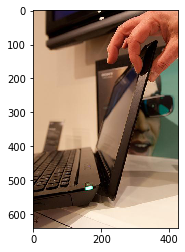

In [57]:
file_id = 9#np.random.choice(bad_img_reference_ids) #409
print(f'file_id: {file_id}')
df = pd.read_csv(os.path.join(data_path,f'refCOCO/attr_tables/attr_{file_id}.tsv'), encoding='utf-8',sep='\t')
img_id = df['image_id'][0]
filename = os.path.join(data_path, f'refCOCO/imgs_by_id/{img_id}.jpg')
print(filename)
image = plt.imread(filename)
plt.imshow(image)
with open(os.path.join(data_path,f'refCOCO/labels/lab_{file_id}.json')) as json_file:
    label = json.load(json_file)
print(label)

df

[[12, 'phone-1', 0.6324215918461323], [9, 'television-2', 0.3358284109595396], [11, 'man-1', 0.2300588236667638], [6, 'laptop-1', 0.2028408131069581], [4, 'face-1', 0.18591713766683537]]


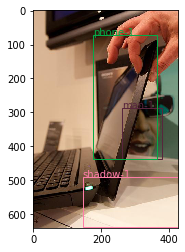

In [66]:
box_data = df[['box_alias', 'x1','y1','w','h']]
fig,ax = plt.subplots(1)
img = image

ax.imshow(img)
rng = [i for i in range(len(box_data))]
for i in rng[10:]:
    name, x,y,w,h = list(box_data.iloc[i,:])
    ax = draw_box_obj(name,x,y,w,h,img,ax)
print(matched_label[file_id])

['picture of person with glasses, behind the screen', 'whole poster actually', 'PIC BEHIND LAPTOP']


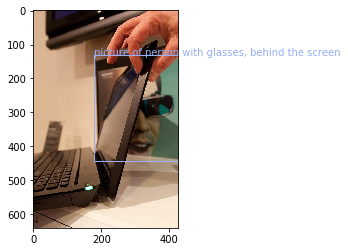

In [59]:
print(label['ref_sents'])
bbox = label['bbox'][0]
sentence = label['ref_sents'][0]
fig,ax_true_label = plt.subplots(1)
ax_true_label.imshow(img)
draw_box_obj(sentence,bbox[0],bbox[1],bbox[2],bbox[3],img,ax_true_label)